# 3.0 Hierarchical clustering - all columns

https://scikit-learn.org/stable/modules/clustering.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/df_tight.csv')

In [3]:
df_mr = pd.read_csv('data/df_mr.csv')

Let's analyze our data under hierarchical clusters. We'll start with a dendrogram visualizing the clusters for our numerical data. We'll start with method='ward', metric='euclidean' (the only possible metric for ward.

In [4]:
# Drop all non-numerical data
X = df.drop(['Strain', 'Strain_type'], axis=1)

We'll use all our rows (no train_test_split) since we're classifying, not predicting, our data.

### Graph: Scipy: dendrogram

Below we'll study our dendrograms using sklearn. For now, we'll use scipy, since only scipy can be used to visaulize a dendrogram.

Our first dendrogram will use the ward method (euclidean affinity).

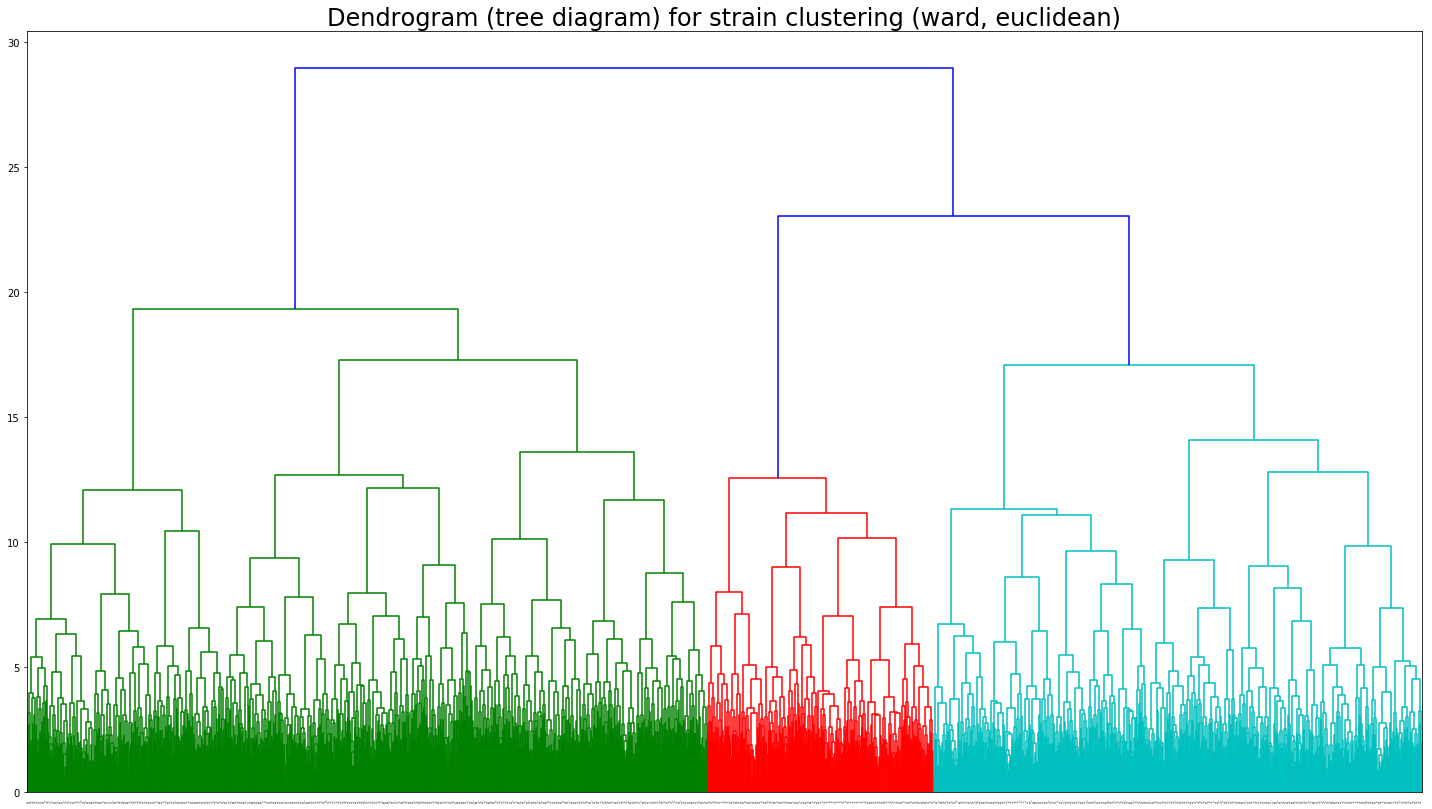

In [5]:
# Dendrogram clustering for ward, euclidean
linky = linkage(X, method='ward')

plt.figure(figsize=(25, 14))
dendrogram(linky, leaf_rotation=90, leaf_font_size=0) # full dendrogram
# dendrogram(linky, truncate_mode='lastp', leaf_rotation=45, leaf_font_size=20)
plt.title('Dendrogram (tree diagram) for strain clustering (ward, euclidean)', fontsize=24)
plt.show();

It looks like we've got three main groups, with 6 possible subgroups in total. Below, we'll explore the features of these 2, 3, and 6 groups to better identify their distinctive characteristics.

### Explore cluster methods/metrics in sklearn

Now we'll explore other hyperparameters for linkeage. Since ward can only be euclidean, we'll try the other two linkage methods (complete, average) for each possible affinity.

Since our initial dendrogram suggested k=3, we'll use just that. Let's start with ward/euclidean.

In [6]:
# method=ward, affinity = euclidean
k=3
clusters = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
clusters.fit(X)
X['cluster_ward']=clusters.labels_ # assign the cluster labels to our dataframe

How balanced are our 'ward' clusters?

In [7]:
X.cluster_ward.value_counts()

0    1039
1     745
2     346
Name: cluster_ward, dtype: int64

It looks like our clusters are more or less evently split between 0 and 1-2, with 2 being about 30% of that cluster (and 15% of the whole set of strains).

Now let's look at our other clusters. Just like we did with ward, we can append them to our numerical dataframe "X".

In [8]:
affinities = ["euclidean", "l1", "l2", "manhattan", "cosine"]
linkages = ["complete", "average"]
k=3

for link in linkages:
    for aff in affinities:
        clusters = AgglomerativeClustering(n_clusters=k, affinity=aff, linkage=link)
        clusters.fit(X)
        X[f'cluster_{link}_{aff}']=clusters.labels_ # assign cluster labels to our dataframe

In [9]:
X.columns

Index(['Lean', 'Sweet', 'Earthy', 'Spicy/Herbal', 'Tropical', 'Pungent',
       'Flowery', 'Blueberry', 'Berry', 'Pine', 'Woody', 'Citrus', 'Diesel',
       'Lemon_Lime', 'Appearment', 'Grape', 'Skunk', 'Eff_Focused',
       'Med_Inflammation', 'Eff_Dizzy', 'Eff_Energetic', 'Eff_Dry_eyes',
       'Med_Lack_of_appetite', 'Eff_Happy', 'Eff_Creative',
       'Med_Muscle_spasms', 'Eff_Sleepy', 'Med_Stress', 'Eff_Tingly',
       'Eff_Aroused', 'Eff_Anxious', 'Med_Nausea', 'Med_Fatigue', 'Med_Cramps',
       'Eff_Uplifted', 'Eff_Headache', 'Eff_Talkative', 'Eff_Paranoid',
       'Eff_Hungry', 'Eff_Giggly', 'Med_Depression', 'Eff_Relaxed', 'Med_Pain',
       'Eff_Euphoric', 'Med_Eye_pressure', 'Eff_Dry_mouth', 'Med_Headaches',
       'Med_Insomnia', 'Rating_scaled', 'Num_reviews_scaled', 'THC_scaled',
       'Apricot_Grapefruit', 'cluster_ward', 'cluster_complete_euclidean',
       'cluster_complete_l1', 'cluster_complete_l2',
       'cluster_complete_manhattan', 'cluster_complete_cosine',
  

Now we can compare our clusters using Adjusted Rand Index.

In [10]:
cluster_list = ['cluster_ward', 'cluster_complete_euclidean', 'cluster_complete_l1',\
                'cluster_complete_l2', 'cluster_complete_manhattan',\
                'cluster_complete_cosine', 'cluster_average_euclidean', 'cluster_average_l1',\
                'cluster_average_l2', 'cluster_average_manhattan', 'cluster_average_cosine']
len(cluster_list)

11

In [11]:
# Compute ARI scores
ARI_scores = []# np.array()
for i in range(0,11):
    for j in range(0,11):
#         if i != j:
        ARI = adjusted_rand_score(X[cluster_list[i]], X[cluster_list[j]])
        ARI_scores.append(ARI)
ARI_scores

[1.0,
 0.45328560954203867,
 0.4575266217282253,
 0.4488729011648173,
 0.44224291069939464,
 0.4488729011648173,
 0.4488729011648173,
 0.4488729011648173,
 0.4488729011648173,
 0.4488729011648173,
 0.34405643113756534,
 0.45328560954203867,
 1.0,
 0.729521649544567,
 0.9101121326745191,
 0.8447368572255082,
 0.9101121326745191,
 0.9101121326745191,
 0.9101121326745191,
 0.9101121326745191,
 0.9101121326745191,
 0.6081628118565814,
 0.4575266217282253,
 0.729521649544567,
 1.0,
 0.7319117944788152,
 0.7726818908592978,
 0.7319117944788152,
 0.7319117944788152,
 0.7319117944788152,
 0.7319117944788152,
 0.7319117944788152,
 0.6205645682936874,
 0.4488729011648173,
 0.9101121326745191,
 0.7319117944788152,
 1.0,
 0.9266478204279421,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6127628356282726,
 0.44224291069939464,
 0.8447368572255082,
 0.7726818908592978,
 0.9266478204279421,
 1.0,
 0.9266478204279421,
 0.9266478204279421,
 0.9266478204279421,
 0.9266478204279421,
 0.9266478204279421,
 0.6190131987

In [12]:
# Before we make a heatmap we'll convert these scores to a df with column_list as labels
ARI_array = np.asarray(ARI_scores)
ARI_array = ARI_array.reshape((11,11))

df_ARI = pd.DataFrame(ARI_array)
df_ARI.columns = cluster_list
df_ARI.index = cluster_list

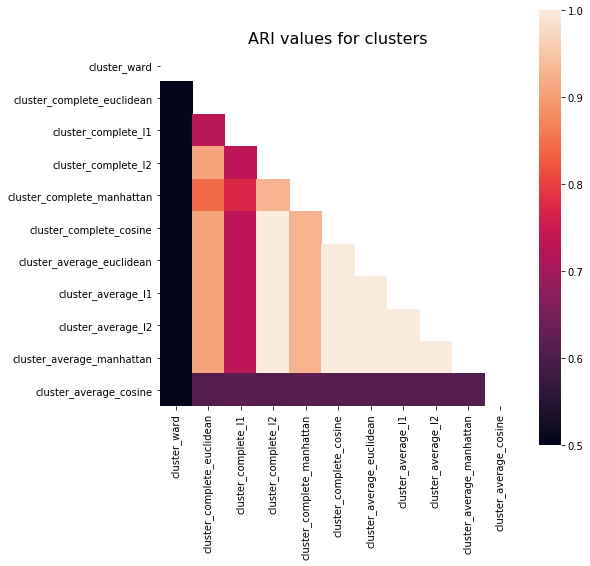

In [13]:
# Visualize ARI values as a heatmap

trianglemask = np.zeros_like(df_ARI, dtype=np.bool)
trianglemask[np.triu_indices_from(trianglemask)] = True

plt.figure(figsize=(8,8))
sns.heatmap(df_ARI, vmin=0.5, vmax=1, square=True, mask=trianglemask)
plt.title('ARI values for clusters', fontsize=16)
plt.show();

NOTE: I also did this with AMI scores - they were pretty comparable to ARI scores, so I'll just look at the ARI heatmap.

It looks like ward is the most dissimilar from other clusters, while scores computed using the "average" method or "complete"/l2 were the most similar.

Let's create a dendrogram for one of the "agreeing" linkage/affinity pairs: average/euclidean.

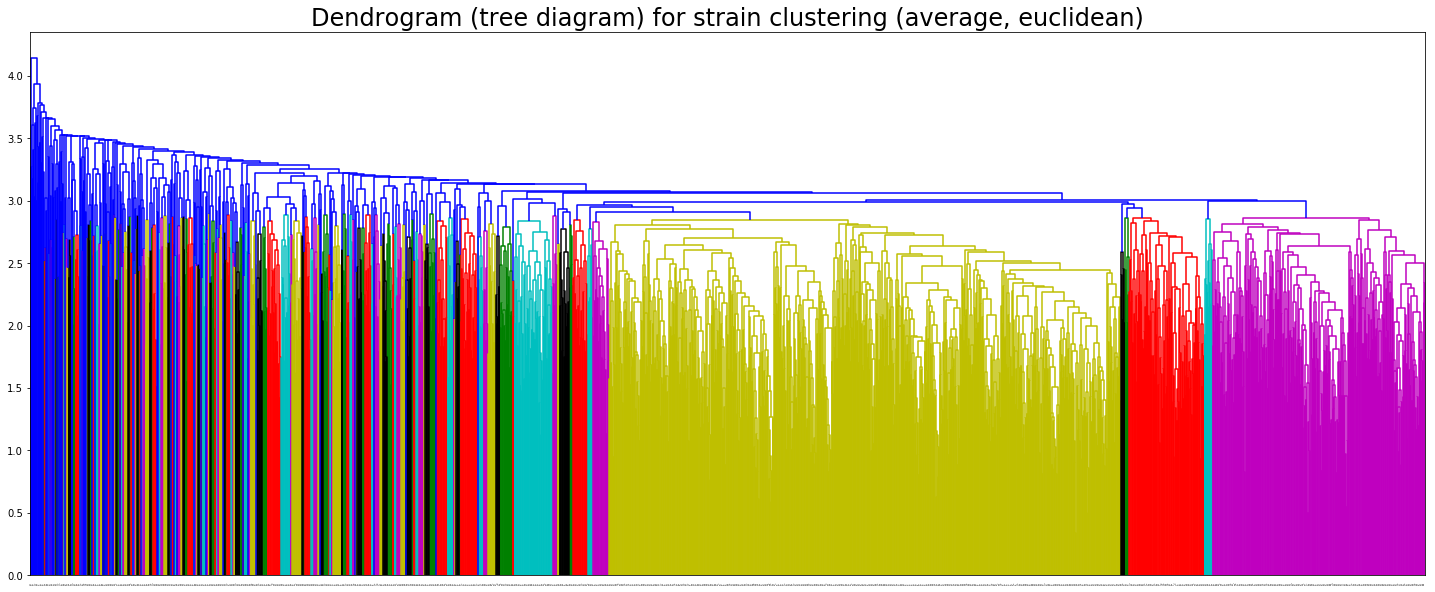

In [14]:
# Dendrogram clustering for average, euclidean
XX = df.drop(['Strain', 'Strain_type'], axis=1) # XX since X is full of cluster data

linky = linkage(XX, method='average', metric='euclidean')

plt.figure(figsize=(25, 10))
dendrogram(linky, leaf_rotation=90, leaf_font_size=0) # full dendrogram
# dendrogram(linky, truncate_mode='lastp', leaf_rotation=45, leaf_font_size=20)
plt.title('Dendrogram (tree diagram) for strain clustering (average, euclidean)', fontsize=24)
plt.show();

This is not a very useful clustering! In fact, having tried a number of other available clusterings, only 'ward' gives us useful diagrams!

From now on, we'll use our original ward clustering.

### Explore k=2, 3, 6 for ward clustering (our best clustering)

Let's get a column for each of our desired clusterings and append the clustering values to X. We can explore clusterings for each value of k in turn.

In [15]:
# Reset X
X = df.drop(['Strain', 'Strain_type'], axis=1)

# Cluster and add columns for k = 2, 3, 6
k_list = [2,3,6]
for k in k_list:
    clusters = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    clusters.fit(X)
    X[f'cluster_{k}']=clusters.labels_ # assign the cluster labels to our dataframe

In [16]:
X

Lean  Sweet  Earthy  Spicy/Herbal  Tropical  Pungent  Flowery  \
0     0.500000    0.0     1.0           0.0       0.0      0.0      1.0   
1     0.570000    0.0     0.0           1.0       0.0      0.0      1.0   
2     0.300000    1.0     0.0           1.0       1.0      0.0      0.0   
3     0.500000    0.0     0.0           0.0       0.0      0.0      0.0   
4     0.540000    1.0     0.0           0.0       0.0      0.0      0.0   
5     0.600000    1.0     0.0           0.0       0.0      0.0      0.0   
6     0.930000    1.0     1.0           0.0       0.0      1.0      0.0   
7     0.290000    0.0     1.0           0.0       0.0      0.0      0.0   
8     0.600000    1.0     1.0           0.0       0.0      0.0      0.0   
9     0.340000    0.0     0.0           0.0       0.0      0.0      0.0   
10    0.710000    0.0     1.0           1.0       0.0      0.0      0.0   
11    0.550000    0.0     1.0           0.0       0.0      0.0      0.0   
12    0.709882    1.0     1.0           0.0       0.0      1.0      0.0   
13    0.534549    0.0     1.0           0.0       0.0      1.0      0.0   
14    0.500000    1.0     0.0           0.0       0.0      1.0      0.0   
15    1.000000    0.0     1.0           1.0       0.0      0.0      0.0   
16    0.700000    1.0     0.0           0.0       0.0      1.0      1.0   
17    1.000000    0.0     0.0           0.0       0.0      0.0      0.0   
18    0.800000    1.0     1.0           0.0       0.0      0.0      0.0   
19    0.830000    0.0     1.0           0.0       0.0      1.0      0.0   
20    0.900000    0.0     0.0           0.0       0.0      1.0      0.0   
21    0.500000    1.0     1.0           0.0       0.0      0.0      0.0   
22    0.500000    0.0     1.0           1.0       0.0      0.0      1.0   
23    0.375000    0.0     1.0           0.0       0.0      0.0      0.0   
24    0.400000    0.0     1.0           0.0       0.0      0.0      0.0   
...        ...    ...     ...           ...       ...      ...      ...   
2105  0.480000    0.0     0.0           0.0       0.0      0.0      0.0   
2106  0.630000    0.0     1.0           0.0       0.0      1.0      0.0   
2107  0.385000    0.0     1.0           0.0       0.0      0.0      0.0   
2108  0.420000    0.0     1.0           0.0       0.0      0.0      0.0   
2109  0.690000    0.0     1.0           0.0       0.0      1.0      0.0   
2110  0.375000    0.0     0.0           0.0       1.0      0.0      0.0   
2111  0.940000    0.0     1.0           0.0       0.0      0.0      0.0   
2112  0.600000    0.0     1.0           0.0       0.0      0.0      0.0   
2113  0.250000    0.0     0.0           0.0       0.0      0.0      1.0   
2114  0.700000    0.0     1.0           0.0       0.0      0.0      0.0   
2115  0.800000    0.0     1.0           0.0       0.0      0.0      0.0   
2116  0.880000    0.0     1.0           0.0       0.0      1.0      0.0   
2117  0.390000    0.0     0.0           0.0       0.0      0.0      0.0   
2118  0.750000    1.0     1.0           0.0       0.0      1.0      0.0   
2119  0.575000    1.0     0.0           0.0       1.0      0.0      0.0   
2120  0.540000    1.0     1.0           1.0       0.0      0.0      0.0   
2121  0.300000    0.0     0.0           0.0       0.0      0.0      0.0   
2122  0.500000    1.0     1.0           0.0       0.0      0.0      0.0   
2123  0.500000    0.0     1.0           0.0       0.0      0.0      0.0   
2124  0.500000    1.0     1.0           0.0       0.0      0.0      0.0   
2125  0.700000    1.0     0.0           0.0       0.0      0.0      0.0   
2126  0.800000    1.0     1.0           0.0       0.0      0.0      0.0   
2127  0.900000    1.0     1.0           0.0       0.0      1.0      0.0   
2128  0.700000    1.0     0.0           0.0       0.0      1.0      0.0   
2129  0.300000    1.0     0.0           0.0       1.0      0.0      0.0   

      Blueberry  Berry  Pine  Woody  Citrus  Diesel  Lemon_Lime  Appearment  \
0           0.0    0.0   0.0  

X how has columns labelling clusters for k = 2, 3, and 6. For each of these values we'll explore two things:

1. The standard deviation of each cluster's features - this will tell us how diffuse the values of feature are within each cluster.

2. The standard deviation (or difference) of feature's average values across all clusters feature. By computing the mean of each cluster's features, we can see how far apart they are from each other and select that cluster's most salient aspects.

### Analysis of ward clustering, k=3

To compare clusters, we need to aggregate our rows these rows by cluster number. When we group by cluster number we'll take the means of our dataframe's numeric values and treat those as our clusters' average values.

In [17]:
k=3
df_c = X.drop(['cluster_2', 'cluster_6'], axis=1)

In [18]:
# WITHIN CLUSTERS
# Get the std for each parameter within a cluster. Make a df of those stds.

df_stds = pd.DataFrame()
for i in range(0,k):
    df_cut = df_c[df_c['cluster_3'] == i]
    std = np.std(df_cut)
    df_stds = df_stds.append(std, ignore_index=True)
df_stds = df_stds.drop('cluster_3', axis=1)

Now we have a df, where each row contains the standard deviation for that group's features. Let's make a heatmap for these groups' stds.

In [19]:
df_stds

Appearment  Apricot_Grapefruit     Berry  Blueberry    Citrus    Diesel  \
0    0.123135            0.167452  0.223905   0.175364  0.499933  0.288225   
1    0.109246            0.081648  0.327456   0.196588  0.199698  0.358708   
2    0.140790            0.075809  0.459756   0.427013  0.238768  0.309032   

     Earthy  Eff_Anxious  Eff_Aroused  Eff_Creative  Eff_Dizzy  Eff_Dry_eyes  \
0  0.496368     0.334526     0.180266      0.381874   0.321566      0.376873   
1  0.402989     0.241398     0.145895      0.256073   0.289352      0.351902   
2  0.388274     0.298534     0.184915      0.289311   0.290580      0.367377   

   Eff_Dry_mouth  Eff_Energetic  Eff_Euphoric  Eff_Focused  Eff_Giggly  \
0       0.361485       0.413985      0.397317     0.378966    0.242696   
1       0.253270       0.204970      0.343311     0.253985    0.213805   
2       0.355676       0.270218      0.365366     0.315109    0.213219   

   Eff_Happy  Eff_Headache  Eff_Hungry  Eff_Paranoid  Eff_Relaxed  Eff_Sleepy  \
0   0.358153      0.252234    0.255821      0.303505     0.440232    0.258330   
1   0.302731      0.203632    0.310798      0.234285     0.245547    0.371508   
2   0.328700      0.227019    0.260664      0.261116     0.319236    0.349750   

   Eff_Talkative  Eff_Tingly  Eff_Uplifted   Flowery     Grape      Lean  \
0       0.293009    0.218408      0.388975  0.311336  0.143965  0.217309   
1       0.184158    0.229265      0.367038  0.397972  0.208698  0.213923   
2       0.219196    0.229591      0.369691  0.203650  0.378602  0.219554   

   Lemon_Lime  Med_Cramps  Med_Depression  Med_Eye_pressure  Med_Fatigue  \
0    0.369929    0.167397        0.359789          0.217254     0.357333   
1    0.250219    0.167583        0.347665          0.159541     0.260825   
2    0.190159    0.191473        0.365772          0.149057     0.288470   

   Med_Headaches  Med_Inflammation  Med_Insomnia  Med_Lack_of_appetite  \
0       0.302433          0.274354      0.325826              0.319485   
1       0.280186          0.272834      0.381473              0.323911   
2       0.309341          0.277063      0.391594              0.308531   

   Med_Muscle_spasms  Med_Nausea  Med_Pain  Med_Stress  Num_reviews_scaled  \
0           0.247264    0.268467  0.389504    0.349205            0.026449   
1           0.246621    0.240547  0.343916    0.294839            0.043188   
2           0.215465    0.229413  0.373281    0.298752            0.060958   

       Pine   Pungent  Rating_scaled     Skunk  Spicy/Herbal     Sweet  \
0  0.324195  0.361863       0.072034  0.301406      0.380111  0.481636   
1  0.417029  0.445921       0.063092  0.230646      0.312973  0.488480   
2  0.167530  0.254072       0.061196  0.119340      0.233371  0.446296   

   THC_scaled  Tropical     Woody  
0    0.298224  0.301406  0.354362  
1    0.298535  0.130940  0.394877  
2    0.298667  0.383512  0.150289

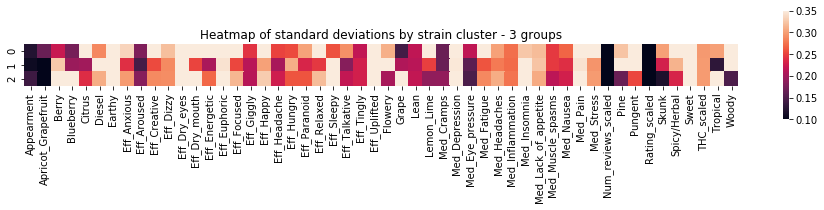

In [20]:
# Heatmap graph the variance (std) within clusters.
# Apply cutoffs to get informative results about the clusters

plt.figure(figsize=(16,2))
figure = sns.heatmap(df_stds, vmin=0.1, vmax=0.35, square=True)
plt.title('Heatmap of standard deviations by strain cluster - 3 groups')
plt.show();
figure.figure.savefig(f'graphs/intra_cluster_stds_3_groups')

Of all the features, Appearmint, Apricot_Grapefruit, Med_Cramps, Med_Eye_pressure, Num_reviews_scaled, and Rating_scaled have consistenty low standard deviation. Given this (and some of their similaraties), we should consider removing them from our final model.

In terms of non-varying categories that differ per group:
0. Group 0 varys little for Berry, Blueberry Grape
1. Group 1 varys little for Blueberry, Citrus, Energetic, Giggle, Eff_Headache, Eff_Talkative, Graphe, and Skunk.
2. Group 2 varys little for Giggly, Eff_Talkative, Flowery, Lemon-Lime, Pine, and Woody

Let's aggregate these groups by their averages. After all, even if two groups have equal standard deviations for the same feature they could have wildly differing averages for them.

In [21]:
# Create df_agg - contains averages of features aggregated by group (group = 3)
df_agg = pd.DataFrame()
for i in range(0,k):
    df_cut = df_c[df_c[f'cluster_{k}'] == i]
#     print(len(df_cut))
    df_temp = df_cut.agg("mean", axis="rows")
    df_agg[i] = df_temp
df_agg = df_agg.T
df_agg.drop(f'cluster_{k}', axis=1, inplace=True) # Drop the "cluster" column
df_agg.shape # should be (n_clusters, 52)

(3, 52)

In [22]:
df_agg

Lean     Sweet    Earthy  Spicy/Herbal  Tropical   Pungent   Flowery  \
0  0.454564  0.365736  0.439846      0.175168  0.101059  0.154957  0.108758   
1  0.617500  0.393289  0.795973      0.110067  0.017450  0.273826  0.197315   
2  0.568879  0.725434  0.184971      0.057803  0.179191  0.069364  0.043353   

   Blueberry     Berry      Pine     Woody    Citrus    Diesel  Lemon_Lime  \
0   0.031761  0.052936  0.119346  0.147257  0.491819  0.091434    0.163619   
1   0.040268  0.122148  0.224161  0.193289  0.041611  0.151678    0.067114   
2   0.239884  0.696532  0.028902  0.023121  0.060694  0.106936    0.037572   

   Appearment     Grape     Skunk  Eff_Focused  Med_Inflammation  Eff_Dizzy  \
0    0.015399  0.021174  0.101059     0.264314          0.123330   0.224330   
1    0.012081  0.045638  0.056376     0.113576          0.134181   0.231115   
2    0.020231  0.173410  0.014451     0.165971          0.129192   0.192425   

   Eff_Energetic  Eff_Dry_eyes  Med_Lack_of_appetite  Eff_Happy  Eff_Creative  \
0       0.344667      0.469876              0.190254   0.695574      0.299294   
1       0.065752      0.504208              0.214855   0.689224      0.119129   
2       0.117263      0.425153              0.203892   0.696591      0.149540   

   Med_Muscle_spasms  Eff_Sleepy  Med_Stress  Eff_Tingly  Eff_Aroused  \
0           0.098257    0.105784    0.770310    0.072195     0.046790   
1           0.102583    0.347957    0.822989    0.089701     0.033507   
2           0.076805    0.248940    0.806004    0.089592     0.051292   

   Eff_Anxious  Med_Nausea  Med_Fatigue  Med_Cramps  Eff_Uplifted  \
0     0.223004    0.125001     0.297338    0.043405      0.545894   
1     0.141427    0.107004     0.130079    0.046453      0.384095   
2     0.167433    0.085917     0.167432    0.056332      0.455680   

   Eff_Headache  Eff_Talkative  Eff_Paranoid  Eff_Hungry  Eff_Giggly  \
0      0.120148       0.133659      0.200564    0.100728    0.088158   
1      0.105337       0.052329      0.143751    0.186128    0.068670   
2      0.105043       0.085636      0.138207    0.127740    0.074895   

   Med_Depression  Eff_Relaxed  Med_Pain  Eff_Euphoric  Med_Eye_pressure  \
0        0.664876     0.547692  0.502226      0.549615          0.063306   
1        0.588221     0.884890  0.687326      0.566697          0.034506   
2        0.574885     0.824334  0.598666      0.509674          0.041609   

   Eff_Dry_mouth  Med_Headaches  Med_Insomnia  Rating_scaled  \
0       0.780116       0.170600      0.199135       0.860059   
1       0.898195       0.148593      0.470417       0.862615   
2       0.798955       0.193184      0.348416       0.871552   

   Num_reviews_scaled  THC_scaled  Apricot_Grapefruit  
0            0.008723    0.345387            0.028874  
1            0.014981    0.371809            0.006711  
2            0.012833    0.308727            0.005780

To see what makes these clusters different from each other we'll want to focus on the parameters of the clusters that vary the most between their average values. Let's add a standard deviation ("std") column (row, in our transposed matrix).

In [23]:
std = np.std(df_agg)
std.name = "std"
df_agg = df_agg.append(std.T, ignore_index=True)
print(df_agg.shape) # (should be n_clusters+1, 52)

(4, 52)


Now graph the inter-cluster stds and the cluster feature averages.

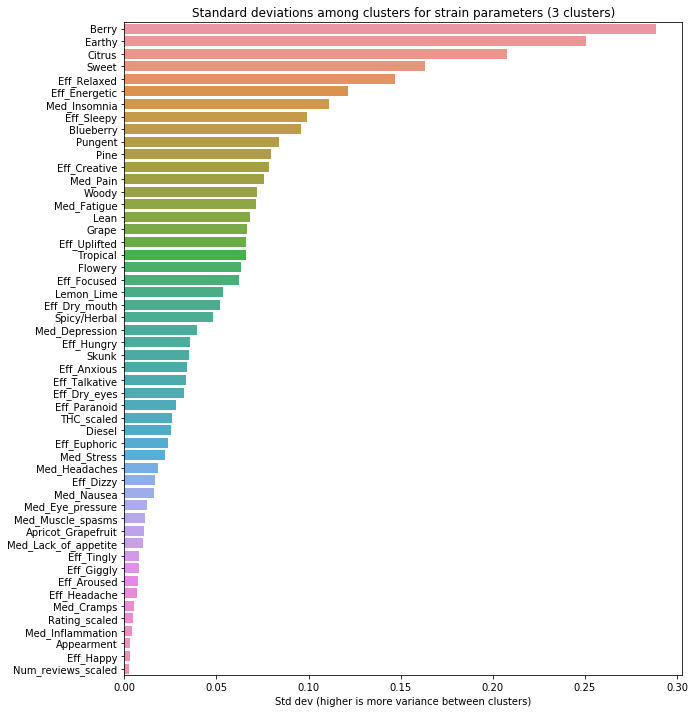

In [24]:
# Bar chart of standard deviations between clusters

cluster_stds = df_agg.iloc[k].sort_values(ascending=False)

plt.figure(figsize=(10,12))
figure = sns.barplot(y=cluster_stds.index, x=cluster_stds.values)
plt.xlabel('Std dev (higher is more variance between clusters)')
plt.title(f'Standard deviations among clusters for strain parameters (3 clusters)')
plt.show();
figure.figure.savefig(f'graphs/inter_cluster_stds_3_clusters')

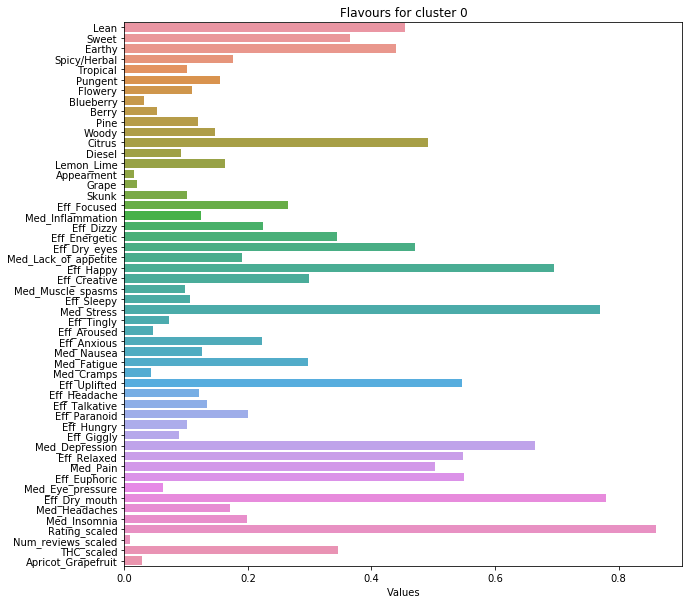

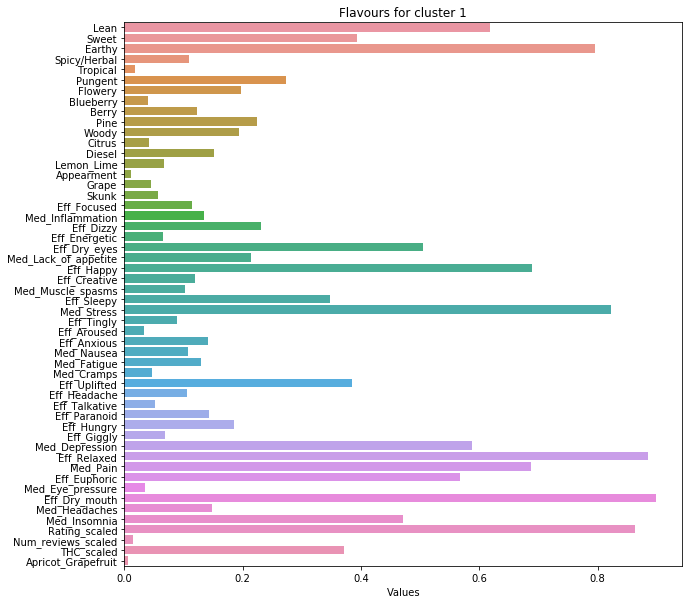

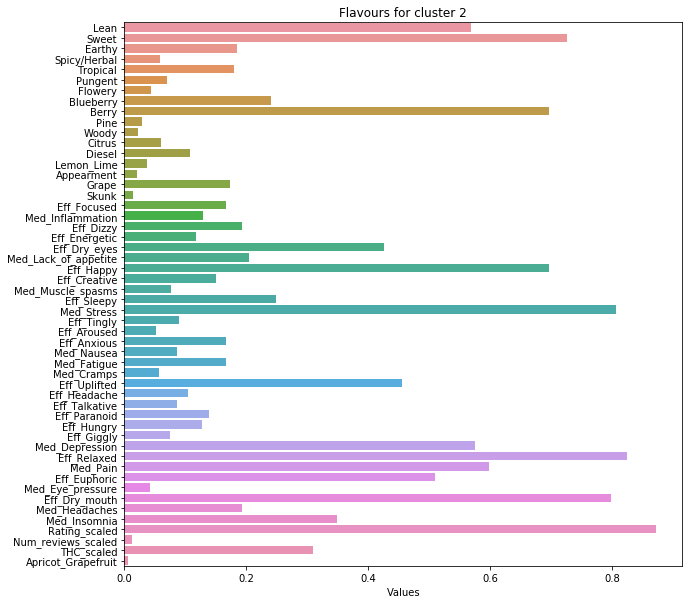

In [25]:
# Graph the flavour averages per cluster
for i in range (0,k):
    plt.figure(figsize=(10,10))
    figure = sns.barplot(y=df_agg.columns, x=df_agg.iloc[i].values)
    plt.xlabel('Values')
    plt.title(f'Flavours for cluster {i}')
    plt.show();
    figure.figure.savefig(f'graphs/cluster_3_clusters_{i}')

It looks like - as we expected from our previous graphs - that some features vary quite a bit across clusters, while others remain relatively constant.

Let's drop features - to start, let's choose the top 15 features and repeat the graphs for individual clusters (above). The choice of 15 is somewhat arbitrary, but it does help us identify our most important features, and 15 features should be more than enough to accurately classify the strains.

In [26]:
useful_features_3clust = cluster_stds.sort_values(ascending=False)[0:15].index
useful_features_3clust

Index(['Berry', 'Earthy', 'Citrus', 'Sweet', 'Eff_Relaxed', 'Eff_Energetic',
       'Med_Insomnia', 'Eff_Sleepy', 'Blueberry', 'Pungent', 'Pine',
       'Eff_Creative', 'Med_Pain', 'Woody', 'Med_Fatigue'],
      dtype='object')

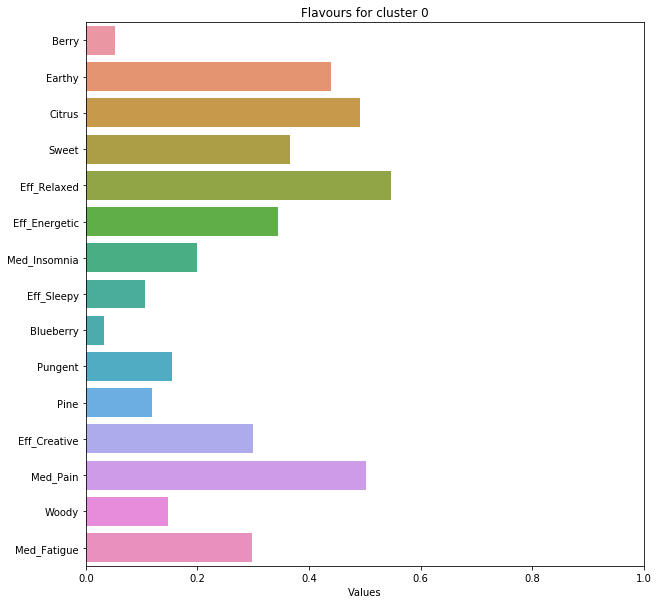

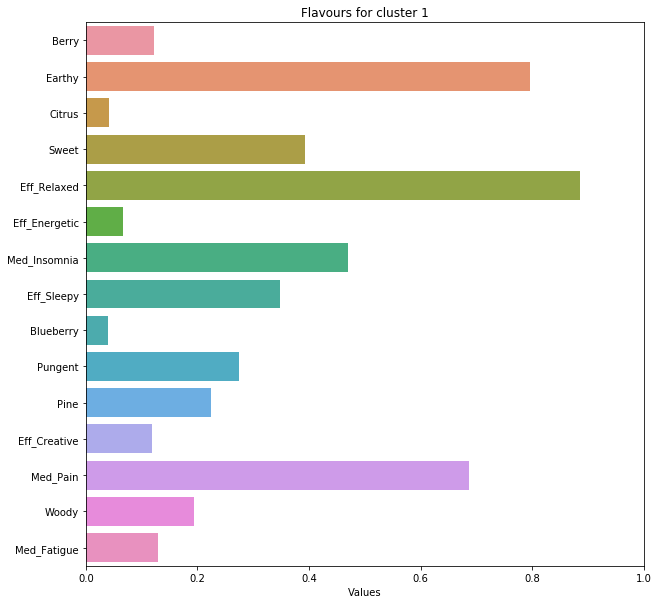

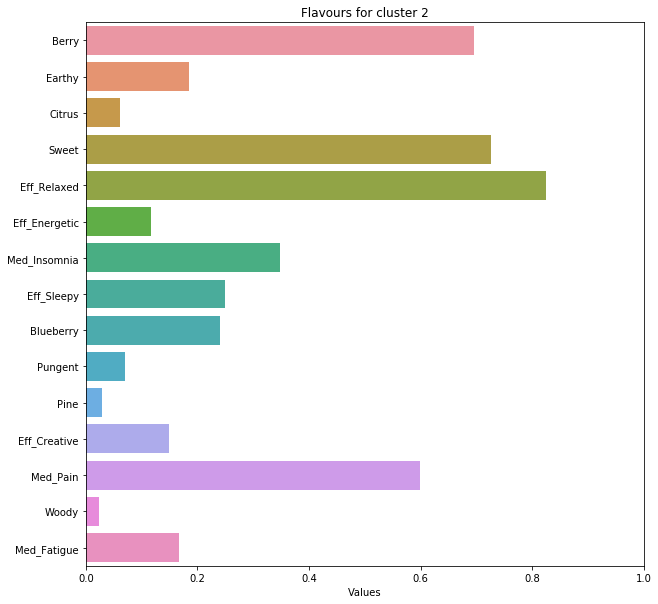

In [27]:
# Graph the flavour averages per cluster
k=3
for i in range (0,k):
    plt.figure(figsize=(10,10))
    figure = sns.barplot(y=df_agg[useful_features_3clust].columns,\
                         x=df_agg[useful_features_3clust].iloc[i].values)
    plt.xlabel('Values')
    plt.xlim(0,1)
    plt.title(f'Flavours for cluster {i}')
    plt.show();
    figure.figure.savefig(f'graphs/cluster_3_clusters_useful_{i}')

Not bad: it seems like we have some good distinction here based on our selected categories. We'll have to see what our model will predict if we only select the most relevant categories (say, top 20, including strain_type) to be factored into clustering.

Since lean isn't even a factor we might want to consider one-hot encoding 'Strain_type' and including it in our model, if we were to create a more robust model based on only these (or these plus a few more) factors.

Now let's take a look at what we get when we consider k=2.

### Analysis of ward clustering, k=2

In [28]:
k=2
df_c = X.drop(['cluster_3', 'cluster_6'], axis=1)

In [29]:
# WITHIN CLUSTERS
# Get the std for each parameter within a cluster. Make a df of those stds.

df_stds = pd.DataFrame()
for i in range(0,k):
    df_cut = df_c[df_c['cluster_2'] == i]
    std = np.std(df_cut)
    df_stds = df_stds.append(std, ignore_index=True)
df_stds = df_stds.drop('cluster_2', axis=1)

In [30]:
df_stds

Appearment  Apricot_Grapefruit     Berry  Blueberry    Citrus    Diesel  \
0    0.120210            0.079843  0.460114   0.304708  0.213052  0.344362   
1    0.123135            0.167452  0.223905   0.175364  0.499933  0.288225   

     Earthy  Eff_Anxious  Eff_Aroused  Eff_Creative  Eff_Dizzy  Eff_Dry_eyes  \
0  0.489444     0.261157     0.159523      0.267438   0.290301      0.358773   
1  0.496368     0.334526     0.180266      0.381874   0.321566      0.376873   

   Eff_Dry_mouth  Eff_Energetic  Eff_Euphoric  Eff_Focused  Eff_Giggly  \
0       0.293351       0.228955      0.351459     0.275925    0.213639   
1       0.361485       0.413985      0.397317     0.378966    0.242696   

   Eff_Happy  Eff_Headache  Eff_Hungry  Eff_Paranoid  Eff_Relaxed  Eff_Sleepy  \
0   0.311221      0.211329    0.297065      0.243129     0.272555    0.367647   
1   0.358153      0.252234    0.255821      0.303505     0.440232    0.258330   

   Eff_Talkative  Eff_Tingly  Eff_Uplifted   Flowery     Grape      Lean  \
0       0.196562    0.229368      0.369387  0.355583  0.280599  0.216908   
1       0.293009    0.218408      0.388975  0.311336  0.143965  0.217309   

   Lemon_Lime  Med_Cramps  Med_Depression  Med_Eye_pressure  Med_Fatigue  \
0    0.233261    0.175572        0.353563          0.156327     0.270458   
1    0.369929    0.167397        0.359789          0.217254     0.357333   

   Med_Headaches  Med_Inflammation  Med_Insomnia  Med_Lack_of_appetite  \
0       0.290492          0.274192      0.388879              0.319155   
1       0.302433          0.274354      0.325826              0.319485   

   Med_Muscle_spasms  Med_Nausea  Med_Pain  Med_Stress  Num_reviews_scaled  \
0           0.237487    0.237275  0.355893    0.296191            0.049529   
1           0.247264    0.268467  0.389504    0.349205            0.026449   

       Pine   Pungent  Rating_scaled     Skunk  Spicy/Herbal     Sweet  \
0  0.368668  0.406582       0.062636  0.203037      0.291121  0.499998   
1  0.324195  0.361863       0.072034  0.301406      0.380111  0.481636   

   THC_scaled  Tropical     Woody  
0    0.300017  0.253019  0.346282  
1    0.298224  0.301406  0.354362

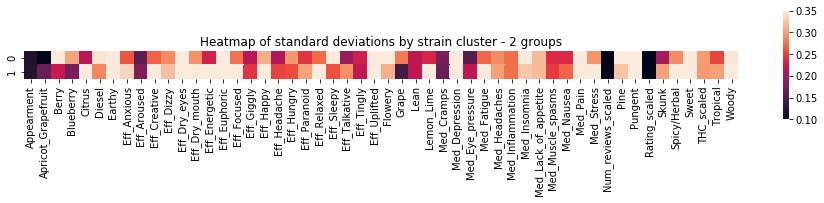

In [31]:
# Heatmap graph the variance (std) within clusters.
# Apply cutoffs to get informative results about the clusters

plt.figure(figsize=(16,2))
figure = sns.heatmap(df_stds, vmin=0.1, vmax=0.35, square=True)
plt.title('Heatmap of standard deviations by strain cluster - 2 groups')
plt.show();
figure.figure.savefig(f'graphs/intra_cluster_stds_2_groups')

0. Cluster 0 has lower stds for citrus, energetic, giggle, headache, talkative, lemon_lime, and tropical.
1. Cluster 1 has lower stds for berry, blueberry, grape, and sleepy.

These two values fall more along what I expected from the typical sativa/indica split.

In [32]:
# Create df_agg - contains averages of features aggregated by group (group = 3)
df_agg = pd.DataFrame()
for i in range(0,k):
    df_cut = df_c[df_c[f'cluster_{k}'] == i]
#     print(len(df_cut))
    df_temp = df_cut.agg("mean", axis="rows")
    df_agg[i] = df_temp
df_agg = df_agg.T
df_agg.drop(f'cluster_{k}', axis=1, inplace=True) # Drop the "cluster" column
df_agg.shape # should be (n_clusters, 52)

(2, 52)

In [33]:
df_agg

Lean     Sweet    Earthy  Spicy/Herbal  Tropical   Pungent   Flowery  \
0  0.602081  0.498625  0.602200      0.093492  0.068744  0.208983  0.148488   
1  0.454564  0.365736  0.439846      0.175168  0.101059  0.154957  0.108758   

   Blueberry     Berry      Pine     Woody    Citrus    Diesel  Lemon_Lime  \
0   0.103575  0.304308  0.162236  0.139322  0.047663  0.137489    0.057745   
1   0.031761  0.052936  0.119346  0.147257  0.491819  0.091434    0.163619   

   Appearment     Grape     Skunk  Eff_Focused  Med_Inflammation  Eff_Dizzy  \
0    0.014665  0.086159  0.043080     0.130192          0.132599   0.218845   
1    0.015399  0.021174  0.101059     0.264314          0.123330   0.224330   

   Eff_Energetic  Eff_Dry_eyes  Med_Lack_of_appetite  Eff_Happy  Eff_Creative  \
0       0.082088      0.479136              0.211379   0.691561      0.128773   
1       0.344667      0.469876              0.190254   0.695574      0.299294   

   Med_Muscle_spasms  Eff_Sleepy  Med_Stress  Eff_Tingly  Eff_Aroused  \
0           0.094408    0.316555    0.817602    0.089667     0.039148   
1           0.098257    0.105784    0.770310    0.072195     0.046790   

   Eff_Anxious  Med_Nausea  Med_Fatigue  Med_Cramps  Eff_Uplifted  \
0     0.149674    0.100317     0.141925    0.049586      0.406798   
1     0.223004    0.125001     0.297338    0.043405      0.545894   

   Eff_Headache  Eff_Talkative  Eff_Paranoid  Eff_Hungry  Eff_Giggly  \
0      0.105244       0.062892      0.141993    0.167611    0.070645   
1      0.120148       0.133659      0.200564    0.100728    0.088158   

   Med_Depression  Eff_Relaxed  Med_Pain  Eff_Euphoric  Med_Eye_pressure  \
0        0.583992     0.865685  0.659208      0.548612          0.036759   
1        0.664876     0.547692  0.502226      0.549615          0.063306   

   Eff_Dry_mouth  Med_Headaches  Med_Insomnia  Rating_scaled  \
0       0.866722       0.162735      0.431726       0.865449   
1       0.780116       0.170600      0.199135       0.860059   

   Num_reviews_scaled  THC_scaled  Apricot_Grapefruit  
0            0.014300    0.351803            0.006416  
1            0.008723    0.345387            0.028874

In [34]:
std = np.std(df_agg)
std.name = "std"
df_agg = df_agg.append(std.T, ignore_index=True)
print(df_agg.shape) # (should be n_clusters+1, 52)

(3, 52)


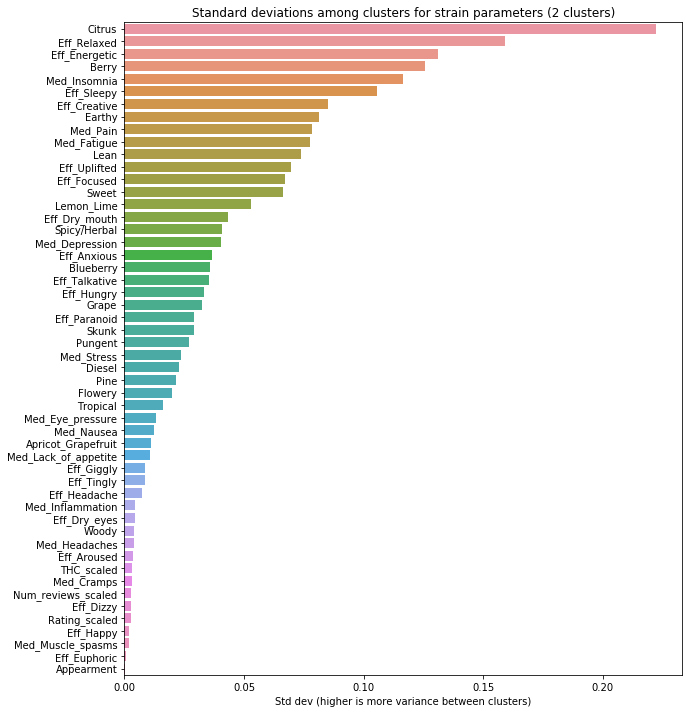

In [35]:
# Bar chart of standard deviations between clusters

cluster_stds = df_agg.iloc[k].sort_values(ascending=False)

plt.figure(figsize=(10,12))
figure = sns.barplot(y=cluster_stds.index, x=cluster_stds.values)
plt.xlabel('Std dev (higher is more variance between clusters)')
plt.title(f'Standard deviations among clusters for strain parameters (2 clusters)')
plt.show();
figure.figure.savefig(f'graphs/inter_cluster_stds_2_clusters')

A little different than k=3, the highest and lowest values are more or less the same. We'll take an even closer look at which values to keep when we do our feature selection for our final model.

In [36]:
useful_features_2clust = cluster_stds.sort_values(ascending=False)[0:15].index
useful_features_2clust

Index(['Citrus', 'Eff_Relaxed', 'Eff_Energetic', 'Berry', 'Med_Insomnia',
       'Eff_Sleepy', 'Eff_Creative', 'Earthy', 'Med_Pain', 'Med_Fatigue',
       'Lean', 'Eff_Uplifted', 'Eff_Focused', 'Sweet', 'Lemon_Lime'],
      dtype='object')

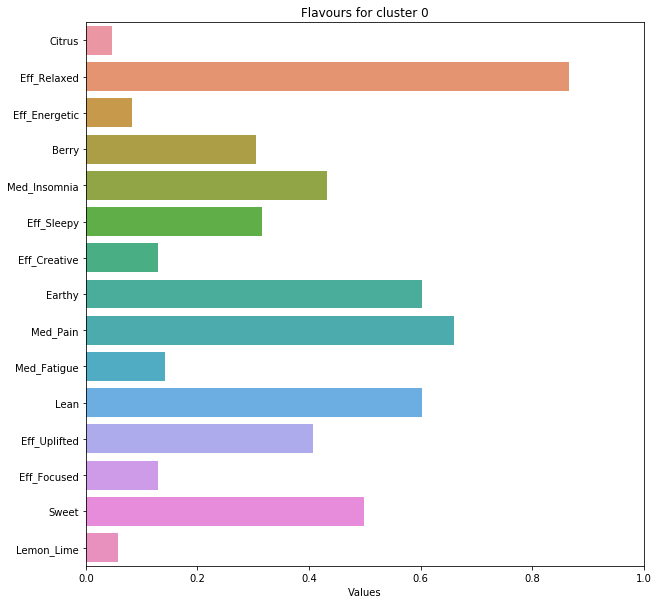

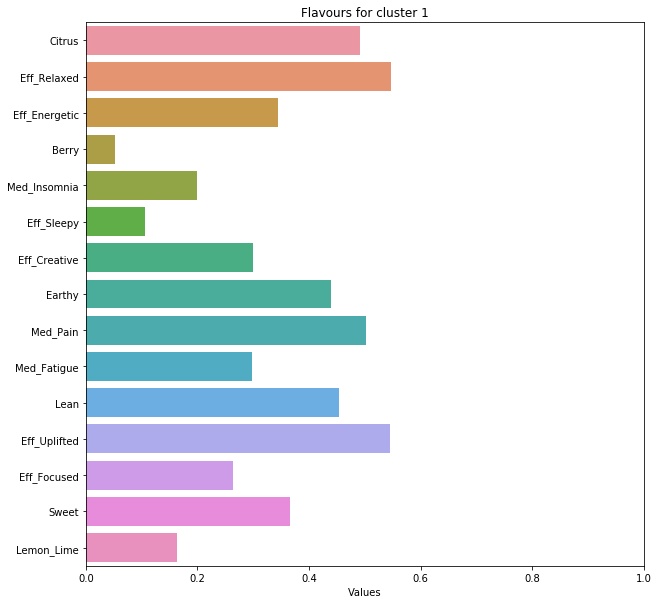

In [37]:
# Graph the flavour averages per cluster
for i in range (0,k):
    plt.figure(figsize=(10,10))
    figure = sns.barplot(y=df_agg[useful_features_2clust].columns,\
                         x=df_agg[useful_features_2clust].iloc[i].values)
    plt.xlabel('Values')
    plt.xlim(0,1)
    plt.title(f'Flavours for cluster {i}')
    plt.show();
    figure.figure.savefig(f'graphs/cluster_2_clusters_useful_{i}')

With 2 clusters we see some good differentiation in certain categories, but less than 3 groups. Now on to six groups.

### Analysis of ward clustering, k=6

In [38]:
k=6
df_c = X.drop(['cluster_2', 'cluster_3'], axis=1)

In [39]:
# WITHIN CLUSTERS
# Get the std for each parameter within a cluster. Make a df of those stds.

df_stds = pd.DataFrame()
for i in range(0,k):
    df_cut = df_c[df_c['cluster_6'] == i]
    std = np.std(df_cut)
    df_stds = df_stds.append(std, ignore_index=True)
df_stds = df_stds.drop('cluster_6', axis=1)

In [40]:
df_stds

Appearment  Apricot_Grapefruit     Berry  Blueberry    Citrus    Diesel  \
0    0.108714            0.084413  0.297431   0.202997  0.197524  0.379660   
1    0.117514            0.117514  0.224474   0.148009  0.371421  0.293544   
2    0.140790            0.075809  0.459756   0.427013  0.238768  0.309032   
3    0.099172            0.202961  0.202961   0.127602  0.424061  0.285326   
4    0.143560            0.174876  0.238459   0.223297  0.493300  0.285426   
5    0.109922            0.077967  0.359896   0.188017  0.202436  0.327660   

     Earthy  Eff_Anxious  Eff_Aroused  Eff_Creative  Eff_Dizzy  Eff_Dry_eyes  \
0  0.445362     0.223325     0.148379      0.278599   0.304432      0.355048   
1  0.469386     0.346908     0.206039      0.397426   0.337519      0.380729   
2  0.388274     0.298534     0.184915      0.289311   0.290580      0.367377   
3  0.430107     0.270607     0.139198      0.301725   0.302436      0.372378   
4  0.484461     0.359314     0.182317      0.403798   0.320681      0.370050   
5  0.320474     0.262478     0.142653      0.219765   0.267790      0.341849   

   Eff_Dry_mouth  Eff_Energetic  Eff_Euphoric  Eff_Focused  Eff_Giggly  \
0       0.242177       0.225139      0.336136     0.269642    0.201834   
1       0.394507       0.401763      0.418185     0.387654    0.269027   
2       0.355676       0.270218      0.365366     0.315109    0.213219   
3       0.288047       0.237944      0.366238     0.313235    0.177829   
4       0.369663       0.417620      0.395198     0.404529    0.258127   
5       0.266777       0.173823      0.343499     0.231602    0.227714   

   Eff_Happy  Eff_Headache  Eff_Hungry  Eff_Paranoid  Eff_Relaxed  Eff_Sleepy  \
0   0.282073      0.195925    0.294310      0.221264     0.268207    0.339180   
1   0.388378      0.257954    0.275174      0.341172     0.432654    0.229300   
2   0.328700      0.227019    0.260664      0.261116     0.319236    0.349750   
3   0.349585      0.192549    0.286839      0.217078     0.264147    0.346879   
4   0.324423      0.284582    0.194524      0.315136     0.389246    0.134147   
5   0.317811      0.213077    0.326032      0.249656     0.208924    0.373380   

   Eff_Talkative  Eff_Tingly  Eff_Uplifted   Flowery     Grape      Lean  \
0       0.207308    0.228528      0.369202  0.468509  0.213442  0.206990   
1       0.289633    0.228419      0.390724  0.206904  0.138648  0.223294   
2       0.219196    0.229591      0.369691  0.203650  0.378602  0.219554   
3       0.198548    0.217764      0.381722  0.338980  0.099172  0.191423   
4       0.343067    0.208918      0.380085  0.357071  0.174876  0.200145   
5       0.147619    0.230098      0.313767  0.180299  0.202436  0.213308   

   Lemon_Lime  Med_Cramps  Med_Depression  Med_Eye_pressure  Med_Fatigue  \
0    0.287480    0.157499        0.333628          0.106798     0.276598   
1    0.229965    0.172141        0.382425          0.219772     0.354148   
2    0.190159    0.191473        0.365772          0.149057     0.288470   
3    0.421974    0.131768        0.359490          0.182502     0.280680   
4    0.407682    0.186624        0.313192          0.238391     0.375919   
5    0.188017    0.179306        0.351607          0.206597     0.236535   

   Med_Headaches  Med_Inflammation  Med_Insomnia  Med_Lack_of_appetite  \
0       0.294807          0.272074      0.370617              0.325174   
1       0.292506          0.266641      0.312660              0.304936   
2       0.309341          0.277063      0.391594              0.308531   
3       0.313356          0.281903      0.380114              0.312647   
4       0.301658          0.275224      0.250278              0.336931   
5       0.258018          0.273771      0.365898              0.322174   

   Med_Muscle_spasms  Med_Nausea  Med_Pain  Med_Stress  Num_reviews_scaled  \
0           0.213195    0.241629  0.338502    0.249334            0.039989   
1           0.264348    0.274761  0.389739    0.374131            0

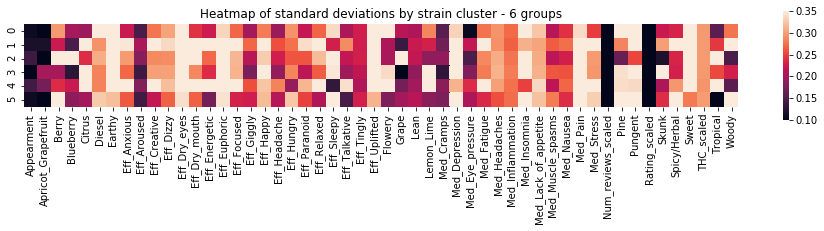

In [41]:
# Heatmap graph the variance (std) within clusters.
# Apply cutoffs to get informative results about the clusters

plt.figure(figsize=(16,2))
figure = sns.heatmap(df_stds, vmin=0.1, vmax=0.35, square=True)
plt.title('Heatmap of standard deviations by strain cluster - 6 groups')
plt.show();
figure.figure.savefig(f'graphs/intra_cluster_stds_6_groups')

There are too many groups here to discuss in depth, but suffice to ay that the uual columns that have low stds for 2 and 3 (Appearment, Apricot_Grapefruit, etc.) have uniformly low-std values here as well.

In [42]:
# Create df_agg - contains averages of features aggregated by group (group = 3)
df_agg = pd.DataFrame()
for i in range(0,k):
    df_cut = df_c[df_c[f'cluster_{k}'] == i]
#     print(len(df_cut))
    df_temp = df_cut.agg("mean", axis="rows")
    df_agg[i] = df_temp
df_agg = df_agg.T
df_agg.drop(f'cluster_{k}', axis=1, inplace=True) # Drop the "cluster" column
df_agg.shape # should be (n_clusters, 52)

(6, 52)

In [43]:
df_agg

Lean     Sweet    Earthy  Spicy/Herbal  Tropical   Pungent   Flowery  \
0  0.580473  0.633971  0.727273      0.057416  0.026316  0.198565  0.325359   
1  0.471579  0.268908  0.672269      0.358543  0.064426  0.145658  0.044818   
2  0.568879  0.725434  0.184971      0.057803  0.179191  0.069364  0.043353   
3  0.539950  0.387417  0.245033      0.056291  0.069536  0.195364  0.132450   
4  0.370721  0.439474  0.376316      0.097368  0.160526  0.131579  0.150000   
5  0.664832  0.085627  0.883792      0.177370  0.006116  0.370031  0.033639   

   Blueberry     Berry      Pine     Woody    Citrus    Diesel  Lemon_Lime  \
0   0.043062  0.098086  0.153110  0.083732  0.040670  0.174641    0.090909   
1   0.022409  0.053221  0.089636  0.352941  0.165266  0.095238    0.056022   
2   0.239884  0.696532  0.028902  0.023121  0.060694  0.106936    0.037572   
3   0.016556  0.043046  0.135762  0.056291  0.764901  0.089404    0.231788   
4   0.052632  0.060526  0.134211  0.026316  0.581579  0.089474    0.210526   
5   0.036697  0.152905  0.314985  0.333333  0.042813  0.122324    0.036697   

   Appearment     Grape     Skunk  Eff_Focused  Med_Inflammation  Eff_Dizzy  \
0    0.011962  0.047847  0.052632     0.125126          0.136642   0.245065   
1    0.014006  0.019608  0.100840     0.296672          0.119620   0.234299   
2    0.020231  0.173410  0.014451     0.165971          0.129192   0.192425   
3    0.009934  0.009934  0.172185     0.170742          0.133022   0.214206   
4    0.021053  0.031579  0.044737     0.308280          0.119113   0.223010   
5    0.012232  0.042813  0.061162     0.098811          0.131035   0.213283   

   Eff_Energetic  Eff_Dry_eyes  Med_Lack_of_appetite  Eff_Happy  Eff_Creative  \
0       0.081362      0.541869              0.219920   0.734937      0.144548   
1       0.323951      0.410756              0.172297   0.632122      0.342259   
2       0.117263      0.425153              0.203892   0.696591      0.149540   
3       0.094816      0.505090              0.193374   0.703913      0.183977   
4       0.562696      0.497431              0.204645   0.748559      0.350576   
5       0.045799      0.456067              0.208382   0.630789      0.086636   

   Med_Muscle_spasms  Eff_Sleepy  Med_Stress  Eff_Tingly  Eff_Aroused  \
0           0.082555    0.249951    0.877891    0.085620     0.034179   
1           0.112882    0.084820    0.722328    0.076470     0.058893   
2           0.076805    0.248940    0.806004    0.089592     0.051292   
3           0.110849    0.231621    0.836693    0.075847     0.031286   
4           0.074510    0.025473    0.762632    0.065276     0.047742   
5           0.128185    0.473238    0.752807    0.094919     0.032649   

   Eff_Anxious  Med_Nausea  Med_Fatigue  Med_Cramps  Eff_Uplifted  \
0     0.135159    0.109407     0.150755    0.039947      0.492510   
1     0.214225    0.123893     0.275707    0.047247      0.524893   
2     0.167433    0.085917     0.167432    0.056332      0.455680   
3     0.165487    0.120572     0.171844    0.031854      0.475853   
4     0.276961    0.129563     0.417393    0.048975      0.621287   
5     0.149439    0.103932     0.103649    0.054770      0.245509   

   Eff_Headache  Eff_Talkative  Eff_Paranoid  Eff_Hungry  Eff_Giggly  \
0      0.104957       0.065932      0.136708    0.153755    0.059998   
1      0.120832       0.128763      0.226232    0.117376    0.107035   
2      0.105043       0.085636      0.138207    0.127740    0.074895   
3      0.093444       0.066794      0.129084    0.146131    0.054858   
4      0.140728       0.191398      0.233257    0.049003    0.096887   
5      0.105823       0.034940      0.152755    0.227511    0.079756   

   Med_Depression  Eff_Relaxed  Med_Pain  Eff_Euphoric  Med_Eye_pressure  \
0        0.645243     0.860289  0.678214      0.612471          0.018699   
1        0.593052     0.580237  0.504749      0.493680          0.066325   
2        0.574885     0.824334  0.598666      0.509674 

In [44]:
std = np.std(df_agg)
std.name = "std"
df_agg = df_agg.append(std.T, ignore_index=True)
print(df_agg.shape) # (should be n_clusters+1, 52)

(7, 52)


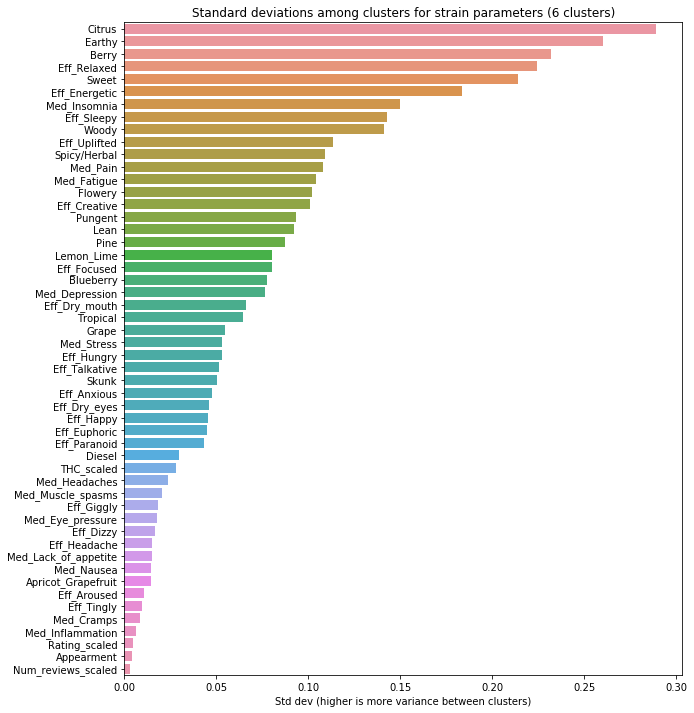

In [45]:
# Bar chart of standard deviations between clusters

cluster_stds = df_agg.iloc[k].sort_values(ascending=False)

plt.figure(figsize=(10,12))
figure = sns.barplot(y=cluster_stds.index, x=cluster_stds.values)
plt.xlabel('Std dev (higher is more variance between clusters)')
plt.title(f'Standard deviations among clusters for strain parameters (6 clusters)')
plt.show();
figure.figure.savefig(f'graphs/inter_cluster_stds_6_clusters')

There's definitely more variance among the 6 groups than, say the 2. It also looks like our top 15 features are different as well.

In [46]:
useful_features_6clust = cluster_stds.sort_values(ascending=False)[0:15].index
useful_features_6clust

Index(['Citrus', 'Earthy', 'Berry', 'Eff_Relaxed', 'Sweet', 'Eff_Energetic',
       'Med_Insomnia', 'Eff_Sleepy', 'Woody', 'Eff_Uplifted', 'Spicy/Herbal',
       'Med_Pain', 'Med_Fatigue', 'Flowery', 'Eff_Creative'],
      dtype='object')

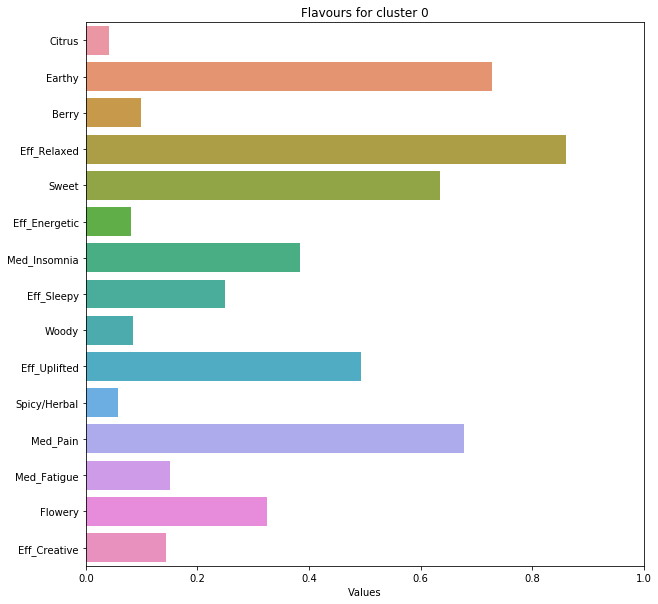

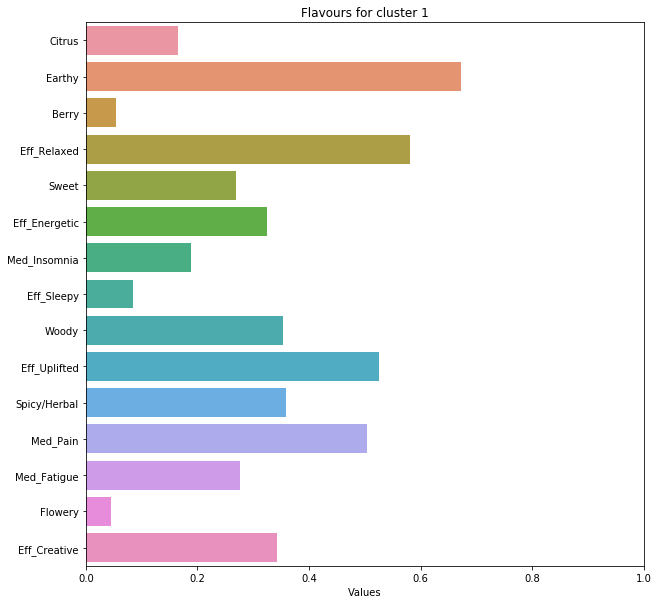

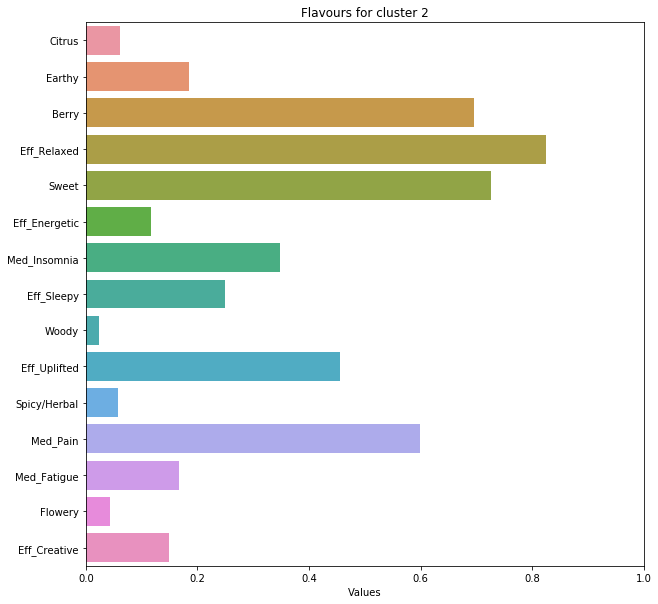

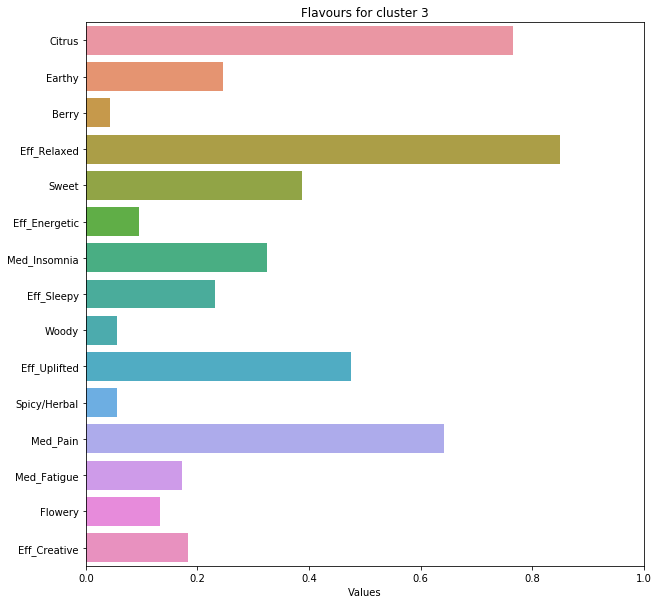

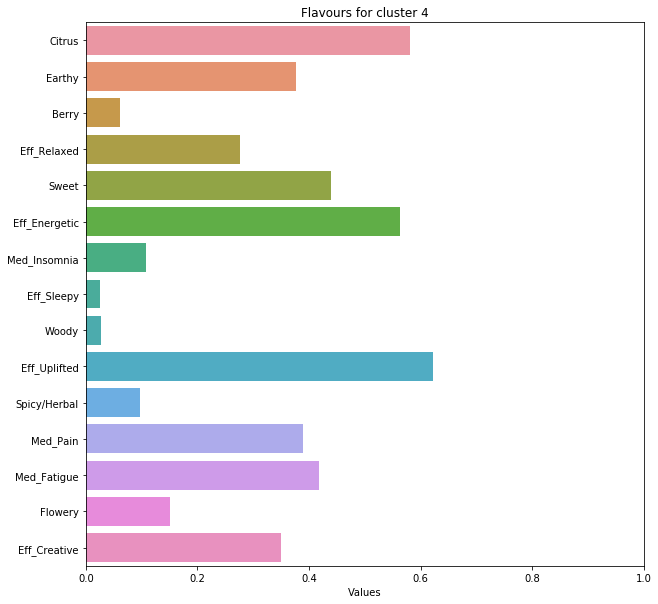

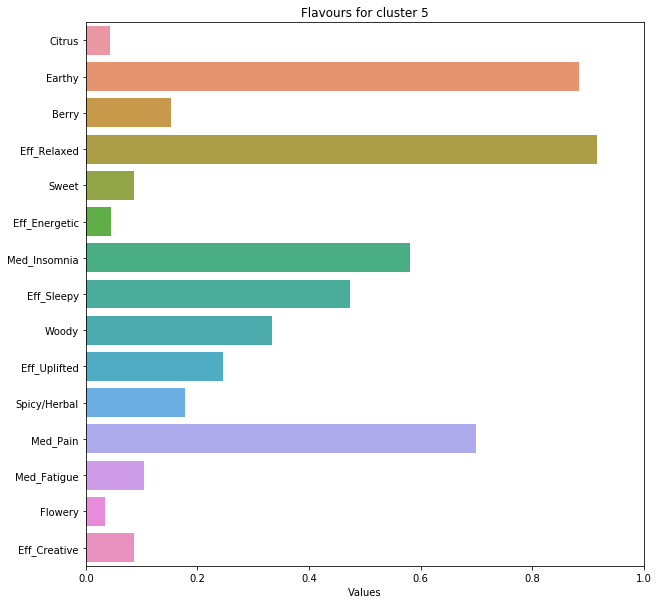

In [47]:
# Graph the flavour averages per cluster
for i in range (0,k):
    plt.figure(figsize=(10,10))
    figure = sns.barplot(y=df_agg[useful_features_6clust].columns,\
                         x=df_agg[useful_features_6clust].iloc[i].values)
    plt.xlabel('Values')
    plt.xlim(0,1)
    plt.title(f'Flavours for cluster {i}')
    plt.show();
    figure.figure.savefig(f'graphs/cluster_6_clusters_useful_{i}')

Definitely more variation! Let's do a fresh model with a one-hot encoded strain_type (as our confidence in lean to distinguish features is eroded for k=2, 3) and our list of most relevant features (minus lean, which we're substituting for strain_type).

We'll do this in a new notebook - 4. Hierarchical clustering (best model)

For our best model, we'll only use these features:

In [48]:
# Let's only use these features:
useful_features = set(useful_features_2clust.values)
for i in useful_features_3clust:
    useful_features.add(i)
for i in useful_features_6clust:
    useful_features.add(i)
print(len(useful_features), useful_features)

21 {'Spicy/Herbal', 'Med_Insomnia', 'Eff_Sleepy', 'Woody', 'Sweet', 'Berry', 'Flowery', 'Med_Pain', 'Eff_Relaxed', 'Lean', 'Eff_Energetic', 'Earthy', 'Med_Fatigue', 'Lemon_Lime', 'Pine', 'Eff_Focused', 'Eff_Uplifted', 'Citrus', 'Blueberry', 'Eff_Creative', 'Pungent'}


In [49]:
useful_features_3clust

Index(['Berry', 'Earthy', 'Citrus', 'Sweet', 'Eff_Relaxed', 'Eff_Energetic',
       'Med_Insomnia', 'Eff_Sleepy', 'Blueberry', 'Pungent', 'Pine',
       'Eff_Creative', 'Med_Pain', 'Woody', 'Med_Fatigue'],
      dtype='object')

In [50]:
useful_features_6clust

Index(['Citrus', 'Earthy', 'Berry', 'Eff_Relaxed', 'Sweet', 'Eff_Energetic',
       'Med_Insomnia', 'Eff_Sleepy', 'Woody', 'Eff_Uplifted', 'Spicy/Herbal',
       'Med_Pain', 'Med_Fatigue', 'Flowery', 'Eff_Creative'],
      dtype='object')

In [51]:
# flavours = ['Sweet', 'Earthy', 'Spicy/Herbal', 'Tropical', 'Pungent',
#        'Flowery', 'Blueberry', 'Berry', 'Pine', 'Woody', 'Citrus', 'Diesel',
#        'Lemon_Lime', 'Appearment', 'Grape', 'Skunk']

# effects = ['Eff_Focused', 'Eff_Dizzy', 'Eff_Energetic', 'Eff_Dry_eyes', 'Eff_Happy',\
#            'Eff_Creative', 'Eff_Sleepy', 'Eff_Tingly', 'Eff_Aroused', 'Eff_Anxious',\
#            'Eff_Uplifted', 'Eff_Headache', 'Eff_Talkative', 'Eff_Paranoid', 'Eff_Hungry',\
#            'Eff_Giggly', 'Eff_Relaxed',  'Eff_Euphoric', 'Eff_Dry_mouth']

# medicals = ['Med_Inflammation', 'Med_Lack_of_appetite', 'Med_Stress', 'Med_Muscle_spasms',\
#             'Med_Nausea', 'Med_Fatigue', 'Med_Cramps', 'Med_Depression', 'Med_Pain',\
#             'Med_Eye_pressure', 'Med_Headaches', 'Med_Insomnia']

In [52]:
df.columns

Index(['Strain', 'Lean', 'Sweet', 'Earthy', 'Spicy/Herbal', 'Tropical',
       'Pungent', 'Flowery', 'Blueberry', 'Berry', 'Pine', 'Woody', 'Citrus',
       'Diesel', 'Lemon_Lime', 'Appearment', 'Grape', 'Skunk', 'Eff_Focused',
       'Med_Inflammation', 'Eff_Dizzy', 'Eff_Energetic', 'Eff_Dry_eyes',
       'Med_Lack_of_appetite', 'Eff_Happy', 'Eff_Creative',
       'Med_Muscle_spasms', 'Eff_Sleepy', 'Med_Stress', 'Eff_Tingly',
       'Eff_Aroused', 'Eff_Anxious', 'Med_Nausea', 'Med_Fatigue', 'Med_Cramps',
       'Eff_Uplifted', 'Eff_Headache', 'Eff_Talkative', 'Eff_Paranoid',
       'Eff_Hungry', 'Eff_Giggly', 'Med_Depression', 'Eff_Relaxed', 'Med_Pain',
       'Eff_Euphoric', 'Med_Eye_pressure', 'Eff_Dry_mouth', 'Med_Headaches',
       'Med_Insomnia', 'Rating_scaled', 'Num_reviews_scaled', 'THC_scaled',
       'Strain_type', 'Apricot_Grapefruit'],
      dtype='object')

Let's also just look at observed features - not THC (which is not useful anyway), no Lean, etc. Just Effects, Medicals, and Flavours.

In [53]:
observed_features = ['Sweet', 'Earthy', 'Spicy/Herbal', 'Tropical', 'Pungent',\
        'Flowery', 'Blueberry', 'Berry', 'Pine', 'Woody', 'Citrus', 'Diesel',\
        'Lemon_Lime', 'Appearment', 'Grape', 'Skunk', 'Eff_Focused', 'Eff_Dizzy',\
        'Eff_Energetic', 'Eff_Dry_eyes', 'Eff_Happy', 'Eff_Creative', 'Eff_Sleepy',\
        'Eff_Tingly', 'Eff_Aroused', 'Eff_Anxious', 'Eff_Uplifted', 'Eff_Headache',\
        'Eff_Talkative', 'Eff_Paranoid', 'Eff_Hungry', 'Eff_Giggly', 'Eff_Relaxed',\
        'Eff_Euphoric', 'Eff_Dry_mouth', 'Med_Inflammation', 'Med_Lack_of_appetite',\
        'Med_Stress', 'Med_Muscle_spasms', 'Med_Nausea', 'Med_Fatigue', 'Med_Cramps',\
        'Med_Depression', 'Med_Pain', 'Med_Eye_pressure', 'Med_Headaches', 'Med_Insomnia']

df_useful = df[observed_features]
df_useful.columns

Index(['Sweet', 'Earthy', 'Spicy/Herbal', 'Tropical', 'Pungent', 'Flowery',
       'Blueberry', 'Berry', 'Pine', 'Woody', 'Citrus', 'Diesel', 'Lemon_Lime',
       'Appearment', 'Grape', 'Skunk', 'Eff_Focused', 'Eff_Dizzy',
       'Eff_Energetic', 'Eff_Dry_eyes', 'Eff_Happy', 'Eff_Creative',
       'Eff_Sleepy', 'Eff_Tingly', 'Eff_Aroused', 'Eff_Anxious',
       'Eff_Uplifted', 'Eff_Headache', 'Eff_Talkative', 'Eff_Paranoid',
       'Eff_Hungry', 'Eff_Giggly', 'Eff_Relaxed', 'Eff_Euphoric',
       'Eff_Dry_mouth', 'Med_Inflammation', 'Med_Lack_of_appetite',
       'Med_Stress', 'Med_Muscle_spasms', 'Med_Nausea', 'Med_Fatigue',
       'Med_Cramps', 'Med_Depression', 'Med_Pain', 'Med_Eye_pressure',
       'Med_Headaches', 'Med_Insomnia'],
      dtype='object')